In [ ]:
!git clone https://github.com/mhamilton723/FeatUp

In [1]:
import os
os.chdir("FeatUp/")

In [2]:
!pip install -e .
!pip install git+https://github.com/mhamilton723/CLIP.git

Obtaining file:///D:/Study/Skoltech/DLBIAproject/FeatUp
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/117.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/117.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/117.0 kB 660.6 kB/s eta 0:00:01
     --------- --------------------------- 30.7/117.0 kB 660.6 kB/s eta 0:00:01
     ------------------- ----------------- 61.4/117.0 kB 409.6 kB/s eta 0:00:01
     ---------------------- -------------- 71.7/117.0 kB 393.8 kB/s eta 0:00:01
     ----------------------------- ------- 92.2/117.0 kB 374.1 kB/s eta 0:00:01
     ------------------------------- ---- 102.4/117.0 kB 310.3 kB/s eta 0:00:01
     ------------------------------------ 117.0/117.0 kB 359.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-pytorch 0.3.3 requires timm==0.9.2, but you have timm 0.4.12 which is incompatible.


  Cloning https://github.com/mhamilton723/CLIP.git to c:\users\user\appdata\local\temp\pip-req-build-tvsdu_0g
  Resolved https://github.com/mhamilton723/CLIP.git to commit dce9d43cc659cb9a013745b378c78077fde6aac0
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/54.4 kB ? eta -:--:--
   ------- -------------------------------- 10.2/54.4 kB ? eta -:--:--
   ------- -------------------------------- 10.2/54.4 kB ? eta -:--:--
   ---------------------------------------- 54.4/54.4 kB 470.1 kB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369876 sha256=0000909618bd11909be21690b6cbc0451594f4228aca4106a36809bc5ed43f9a
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-8ezltk9t\wheels\32\0a\e7\f67afb837d0ff84c290267fc3bfbdefad0ea14f4a30d655443
Successfully built clip
  Attempting uninstall: wcwidth
    Found existing installation: wcwi

  Running command git clone --filter=blob:none --quiet https://github.com/mhamilton723/CLIP.git 'C:\Users\User\AppData\Local\Temp\pip-req-build-tvsdu_0g'


In [3]:
import torch
import torchvision.transforms as T
from PIL import Image

from featup.util import norm, unnorm
from featup.plotting import plot_feats, plot_lang_heatmaps

In [5]:
mask_path = "../lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_13_mask.tif"
image_path = "../lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_13.tif"

input_size = 224
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_norm = True

transform = T.Compose([
    T.Resize(input_size),
    T.CenterCrop((input_size, input_size)),
    T.ToTensor(),
    norm
])

image_tensor = transform(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)

c:\Users\User\anaconda3\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/mhamilton723/FeatUp/zipball/main" to C:\Users\User/.cache\torch\hub\main.zip
Downloading: "https://github.com/facebookresearch/dino/zipball/main" to C:\Users\User/.cache\torch\hub\main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth" to C:\Users\User/.cache

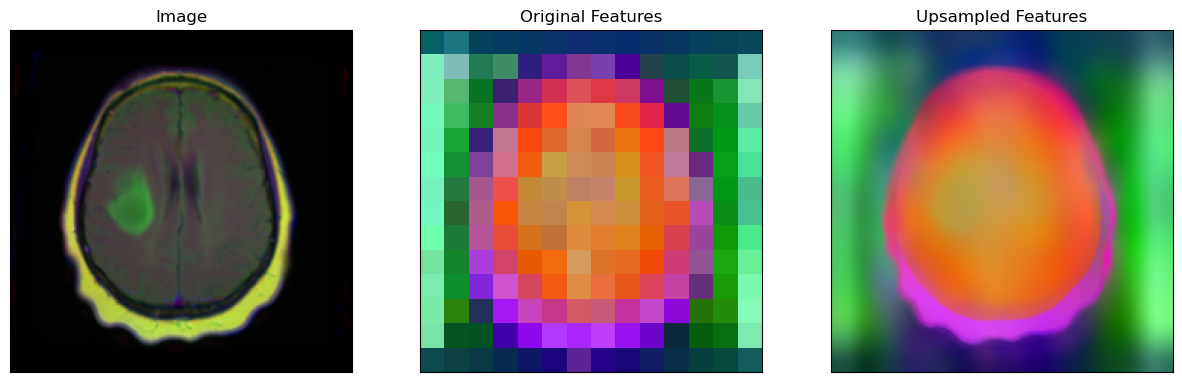

In [6]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dino16', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])